<a href="https://colab.research.google.com/github/Anagh3/mainproject/blob/resnet50/resnet50new.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

import os

#path='/content/gdrive/MyDrive/StyleTransfer'
path='/content/gdrive/MyDrive/NST'
os.chdir(path)
!dir



Mounted at /content/gdrive
Dataset  out.jpg  stylized-image.png  VGG16


In [ ]:
# import os
# import tensorflow as tf
# # Load compressed models from tensorflow_hub
# os.environ['TFHUB_MODEL_LOAD_FORMAT'] = 'COMPRESSED'
# import IPython.display as display

# import matplotlib.pyplot as plt
# import matplotlib as mpl
# mpl.rcParams['figure.figsize'] = (12, 12)
# mpl.rcParams['axes.grid'] = False

# import numpy as np
# import PIL.Image
# import time
# import functools

# def tensor_to_image(tensor):
#     tensor = tensor*255
#     tensor = np.array(tensor, dtype=np.uint8)
#     if np.ndim(tensor) > 3:
#         assert tensor.shape[0] == 1
#         tensor = tensor[0]
#     return PIL.Image.fromarray(tensor)

# content_path = '/content/gdrive/MyDrive/NST/Dataset/Content/monalisa.jpg'
# style_path = '/content/gdrive/MyDrive/NST/Dataset/Style/abstract.jpeg'

# def load_img(path_to_img):
#     max_dim = 512
#     img = tf.io.read_file(path_to_img)
#     img = tf.image.decode_image(img, channels=3)
#     img = tf.image.convert_image_dtype(img, tf.float32)

#     shape = tf.cast(tf.shape(img)[:-1], tf.float32)
#     long_dim = max(shape)
#     scale = max_dim / long_dim

#     new_shape = tf.cast(shape * scale, tf.int32)

#     img = tf.image.resize(img, new_shape)
#     img = img[tf.newaxis, :]
#     return img

# def imshow(image, title=None):
#     if len(image.shape) > 3:
#         image = tf.squeeze(image, axis=0)

#     plt.imshow(image)
#     if title:
#         plt.title(title)

# content_image = load_img(content_path)
# style_image = load_img(style_path)

# plt.subplot(1, 2, 1)
# imshow(content_image, 'Content Image')

# plt.subplot(1, 2, 2)
# imshow(style_image, 'Style Image')

# import tensorflow_hub as hub

# # Load the ResNet50 model
# hub_model = hub.load('https://tfhub.dev/google/magenta/arbitrary-image-stylization-v1-256/2')

# # Stylize the image
# stylized_image = hub_model(tf.constant(content_image), tf.constant(style_image))[0]
# tensor_to_image(stylized_image)

# # Preprocess input for ResNet50
# def preprocess_input_resnet50(image):
#     image = tf.keras.applications.resnet50.preprocess_input(image)
#     return image

# # Load ResNet50 model
# resnet_model = tf.keras.applications.ResNet50(include_top=True, weights='imagenet')

# # Preprocess input image
# x = preprocess_input_resnet50(content_image)
# x = tf.image.resize(x, (224, 224))

# # Get predictions from ResNet50
# prediction_probabilities = resnet_model(x)
# prediction_probabilities.shape

# # Decode predictions
# predicted_top_5 = tf.keras.applications.resnet50.decode_predictions(prediction_probabilities.numpy())[0]
# [(class_name, prob) for (number, class_name, prob) in predicted_top_5]

# # Select layers for content and style extraction (these layers are different for ResNet50)
# content_layers = ['conv5_block3_out']

# style_layers = ['conv1_conv', 'conv2_block3_out', 'conv3_block4_out', 'conv4_block6_out', 'conv5_block3_out']

# num_content_layers = len(content_layers)
# num_style_layers = len(style_layers)

# # Function to extract ResNet50 layers
# def resnet_layers(layer_names):
#     resnet = tf.keras.applications.ResNet50(include_top=False, weights='imagenet')
#     resnet.trainable = False
#     outputs = [resnet.get_layer(name).output for name in layer_names]
#     model = tf.keras.Model([resnet.input], outputs)
#     return model

# style_extractor = resnet_layers(style_layers)
# style_outputs = style_extractor(style_image)

# # Look at the statistics of each layer's output
# for name, output in zip(style_layers, style_outputs):
#     print(name)
#     print("  shape: ", output.numpy().shape)
#     print("  min: ", output.numpy().min())
#     print("  max: ", output.numpy().max())
#     print("  mean: ", output.numpy().mean())
#     print()

# # Function to compute Gram matrix
# def gram_matrix(input_tensor):
#     result = tf.linalg.einsum('bijc,bijd->bcd', input_tensor, input_tensor)
#     input_shape = tf.shape(input_tensor)
#     num_locations = tf.cast(input_shape[1]*input_shape[2], tf.float32)
#     return result / (num_locations)

# # Model to extract style and content from ResNet50
# class StyleContentModel(tf.keras.models.Model):
#     def __init__(self, style_layers, content_layers):
#         super(StyleContentModel, self).__init__()
#         self.resnet = resnet_layers(style_layers + content_layers)
#         self.style_layers = style_layers
#         self.content_layers = content_layers
#         self.num_style_layers = len(style_layers)
#         self.resnet.trainable = False

#     def call(self, inputs):
#         inputs = preprocess_input_resnet50(inputs * 255.0)
#         outputs = self.resnet(inputs)
#         style_outputs, content_outputs = (outputs[:self.num_style_layers], outputs[self.num_style_layers:])
#         style_outputs = [gram_matrix(style_output) for style_output in style_outputs]

#         content_dict = {content_name: value for content_name, value in zip(self.content_layers, content_outputs)}
#         style_dict = {style_name: value for style_name, value in zip(self.style_layers, style_outputs)}

#         return {'content': content_dict, 'style': style_dict}

# extractor = StyleContentModel(style_layers, content_layers)

# results = extractor(tf.constant(content_image))

# print('Styles:')
# for name, output in sorted(results['style'].items()):
#     print("  ", name)
#     print("    shape: ", output.numpy().shape)
#     print("    min: ", output.numpy().min())
#     print("    max: ", output.numpy().max())
#     print("    mean: ", output.numpy().mean())
#     print()

# print("Contents:")
# for name, output in sorted(results['content'].items()):
#     print("  ", name)
#     print("    shape: ", output.numpy().shape)
#     print("    min: ", output.numpy().min())
#     print("    max: ", output.numpy().max())
#     print("    mean: ", output.numpy().mean())

# style_targets = extractor(style_image)['style']
# content_targets = extractor(content_image)['content']

# image = tf.Variable(content_image)

# def clip_0_1(image):
#     return tf.clip_by_value(image, clip_value_min=0.0, clip_value_max=1.0)

# opt = tf.keras.optimizers.Adam(learning_rate=0.02, beta_1=0.99, epsilon=1e-1)
# style_weight = 1e-2
# content_weight = 1e4

# def style_content_loss(outputs):
#     style_outputs = outputs['style']
#     content_outputs = outputs['content']
#     style_loss = tf.add_n([tf.reduce_mean((style_outputs[name] - style_targets[name]) ** 2) for name in style_outputs.keys()])
#     style_loss *= style_weight / num_style_layers

#     content_loss = tf.add_n([tf.reduce_mean((content_outputs[name] - content_targets[name]) ** 2) for name in content_outputs.keys()])
#     content_loss *= content_weight / num_content_layers
#     loss = style_loss + content_loss
#     return loss

# @tf.function()
# def train_step(image):
#     with tf.GradientTape() as tape:
#         outputs = extractor(image)
#         loss = style_content_loss(outputs)

#     grad = tape.gradient(loss, image)
#     opt.apply_gradients([(grad, image)])
#     image.assign(clip_0_1(image))

# train_step(image)
# train_step(image)
# train_step(image)
# tensor_to_image(image)

# import time
# start = time.time()

# epochs = 10
# steps_per_epoch = 100

# step = 0
# for n in range(epochs):
#     for m in range(steps_per_epoch):
#         step += 1
#         train_step(image)
#         print(".", end='', flush=True)
#     display.clear_output(wait=True)
#     display.display(tensor_to_image(image))
#     print("Train step: {}".format(step))

# end = time.time()
# print("Total time: {:.1f}".format(end - start))

# def high_pass_x_y(image):
#     x_var = image[:, :, 1:, :] - image[:, :, :-1, :]
#     y_var = image[:, 1:, :, :] - image[:, :-1, :, :]
#     return x_var, y_var

# x_deltas, y_deltas = high_pass_x_y(content_image)

# plt.figure(figsize=(14, 10))
# plt.subplot(2, 2, 1)
# imshow(clip_0_1(2*y_deltas+0.5), "Horizontal Deltas: Original")

# plt.subplot(2, 2, 2)
# imshow(clip_0_1(2*x_deltas+0.5), "Vertical Deltas: Original")

# x_deltas, y_deltas = high_pass_x_y(image)

# plt.subplot(2, 2, 3)
# imshow(clip_0_1(2*y_deltas+0.5), "Horizontal Deltas: Styled")

# plt.subplot(2, 2, 4)
# imshow(clip_0_1(2*x_deltas+0.5), "Vertical Deltas: Styled")
# plt.figure(figsize=(14, 10))

# sobel = tf.image.sobel_edges(content_image)
# plt.subplot(1, 2, 1)
# imshow(clip_0_1(sobel[..., 0]/4+0.5), "Horizontal Sobel-edges")
# plt.subplot(1, 2, 2)
# imshow(clip_0_1(sobel[..., 1]/4+0.5), "Vertical Sobel-edges")

# def total_variation_loss(image):
#     x_deltas, y_deltas = high_pass_x_y(image)
#     return tf.reduce_sum(tf.abs(x_deltas)) + tf.reduce_sum(tf.abs(y_deltas))

# total_variation_loss(image).numpy()
# tf.image.total_variation(image).numpy()

# total_variation_weight = 30

# @tf.function()
# def train_step(image):
#     with tf.GradientTape() as tape:
#         outputs = extractor(image)
#         loss = style_content_loss(outputs)
#         loss += total_variation_weight * tf.image.total_variation(image)

#     grad = tape.gradient(loss, image)
#     opt.apply_gradients([(grad, image)])
#     image.assign(clip_0_1(image))

# opt = tf.keras.optimizers.Adam(learning_rate=0.02, beta_1=0.99, epsilon=1e-1)
# image = tf.Variable(content_image)

# import time
# start = time.time()

# epochs = 10
# steps_per_epoch = 100

# step = 0
# for n in range(epochs):
#     for m in range(steps_per_epoch):
#         step += 1
#         train_step(image)
#         print(".", end='', flush=True)
#     display.clear_output(wait=True)
#     display.display(tensor_to_image(image))
#     print("Train step: {}".format(step))

# end = time.time()
# print("Total time: {:.1f}".format(end - start))

# file_name = 'stylized-image.png'
# tensor_to_image(image).save(file_name)

# try:
#     from google.colab import files
# except ImportError:
#     pass
# else:
#     files.download(file_name)


In [ ]:
# import os
# import tensorflow as tf
# import numpy as np
# import PIL.Image
# import matplotlib.pyplot as plt
# import tensorflow_hub as hub


# # Load compressed models from tensorflow_hub
# os.environ['TFHUB_MODEL_LOAD_FORMAT'] = 'COMPRESSED'
# import IPython.display as display

# # Function to convert tensor to image
# def tensor_to_image(tensor):
#     tensor = tensor * 255
#     tensor = np.array(tensor, dtype=np.uint8)
#     if np.ndim(tensor) > 3:
#         assert tensor.shape[0] == 1
#         tensor = tensor[0]
#     return PIL.Image.fromarray(tensor)

# # Define paths to content and style images
# content_path = '/content/gdrive/MyDrive/NST/Dataset/Content/monalisa.jpg'
# style_path = '/content/gdrive/MyDrive/NST/Dataset/Style/abstract.jpeg'

# # Function to load and preprocess images
# def load_img(path_to_img):
#     max_dim = 512
#     img = tf.io.read_file(path_to_img)
#     img = tf.image.decode_image(img, channels=3)
#     img = tf.image.convert_image_dtype(img, tf.float32)

#     shape = tf.cast(tf.shape(img)[:-1], tf.float32)
#     long_dim = max(shape)
#     scale = max_dim / long_dim

#     new_shape = tf.cast(shape * scale, tf.int32)

#     img = tf.image.resize(img, new_shape)
#     img = img[tf.newaxis, :]
#     return img

# # Function to display images
# def imshow(image, title=None):
#     if len(image.shape) > 3:
#         image = tf.squeeze(image, axis=0)
#     plt.imshow(image)
#     if title:
#         plt.title(title)

# # Load content and style images
# content_image = load_img(content_path)
# style_image = load_img(style_path)

# # Show the content and style images
# plt.subplot(1, 2, 1)
# imshow(content_image, 'Content Image')

# plt.subplot(1, 2, 2)
# imshow(style_image, 'Style Image')
# plt.show()

# # Load the ResNet50 model
# hub_model = hub.load('https://tfhub.dev/google/magenta/arbitrary-image-stylization-v1-256/2')

# # Stylize the image
# stylized_image = hub_model(tf.constant(content_image), tf.constant(style_image))[0]
# tensor_to_image(stylized_image)
# import tensorflow as tf

# # Preprocess input for ResNet50
# def preprocess_input_resnet50(image):
#     image = tf.keras.applications.resnet50.preprocess_input(image)
#     return image

# # Load ResNet50 model
# resnet_model = tf.keras.applications.ResNet50(include_top=True, weights='imagenet')

# # Preprocess input image
# x = preprocess_input_resnet50(content_image)
# x = tf.image.resize(x, (224, 224))

# # Get predictions from ResNet50
# prediction_probabilities = resnet_model(x)

# # Decode predictions
# predicted_top_5 = tf.keras.applications.resnet50.decode_predictions(prediction_probabilities.numpy())[0]
# [(class_name, prob) for (number, class_name, prob) in predicted_top_5]

# # Select layers for content and style extraction (these layers are different for ResNet50)
# content_layers = ['conv5_block3_out']
# style_layers = ['conv1_conv', 'conv2_block3_out', 'conv3_block4_out', 'conv4_block6_out', 'conv5_block3_out']

# num_content_layers = len(content_layers)
# num_style_layers = len(style_layers)

# # Function to extract ResNet50 layers
# def resnet_layers(layer_names):
#     resnet = tf.keras.applications.ResNet50(include_top=False, weights='imagenet')
#     resnet.trainable = False
#     outputs = [resnet.get_layer(name).output for name in layer_names]
#     model = tf.keras.Model([resnet.input], outputs)
#     return model

# # Model for extracting style and content from ResNet50
# class StyleContentModel(tf.keras.models.Model):
#     def __init__(self, style_layers, content_layers):
#         super(StyleContentModel, self).__init__()
#         self.resnet = resnet_layers(style_layers + content_layers)
#         self.style_layers = style_layers
#         self.content_layers = content_layers
#         self.num_style_layers = len(style_layers)
#         self.resnet.trainable = False

#     def call(self, inputs):
#         inputs = preprocess_input_resnet50(inputs * 255.0)
#         outputs = self.resnet(inputs)
#         style_outputs, content_outputs = (outputs[:self.num_style_layers], outputs[self.num_style_layers:])
#         style_outputs = [gram_matrix(style_output) for style_output in style_outputs]

#         content_dict = {content_name: value for content_name, value in zip(self.content_layers, content_outputs)}
#         style_dict = {style_name: value for style_name, value in zip(self.style_layers, style_outputs)}

#         return {'content': content_dict, 'style': style_dict}

# # Gram matrix calculation
# def gram_matrix(input_tensor):
#     result = tf.linalg.einsum('bijc,bijd->bcd', input_tensor, input_tensor)
#     input_shape = tf.shape(input_tensor)
#     num_locations = tf.cast(input_shape[1]*input_shape[2], tf.float32)
#     return result / (num_locations)

# # Instantiate the model
# extractor = StyleContentModel(style_layers, content_layers)

# # Compute style and content targets
# style_targets = extractor(style_image)['style']
# content_targets = extractor(content_image)['content']

# image = tf.Variable(content_image)

# # Define optimizer
# opt = tf.keras.optimizers.Adam(learning_rate=0.02, beta_1=0.99, epsilon=1e-1)

# # Define style and content weights
# style_weight = 1e-2
# content_weight = 1e4

# # Loss function for style and content
# def style_content_loss(outputs):
#     style_outputs = outputs['style']
#     content_outputs = outputs['content']
#     style_loss = tf.add_n([tf.reduce_mean((style_outputs[name] - style_targets[name]) ** 2) for name in style_outputs.keys()])
#     style_loss *= style_weight / num_style_layers

#     content_loss = tf.add_n([tf.reduce_mean((content_outputs[name] - content_targets[name]) ** 2) for name in content_outputs.keys()])
#     content_loss *= content_weight / num_content_layers
#     loss = style_loss + content_loss
#     return loss

# # Training step function
# @tf.function()
# def train_step(image):
#     with tf.GradientTape() as tape:
#         outputs = extractor(image)
#         loss = style_content_loss(outputs)

#     grad = tape.gradient(loss, image)
#     opt.apply_gradients([(grad, image)])
#     image.assign(clip_0_1(image))

# # Total variation regularization
# total_variation_weight = 30

# # Function to clip image values
# def clip_0_1(image):
#     return tf.clip_by_value(image, clip_value_min=0.0, clip_value_max=1.0)

# # Training loop
# import time

# start = time.time()

# epochs = 10
# steps_per_epoch = 100

# step = 0
# for n in range(epochs):
#     for m in range(steps_per_epoch):
#         step += 1
#         train_step(image)
#         print(".", end='', flush=True)
#     display.clear_output(wait=True)
#     display.display(tensor_to_image(image))
#     print("Train step: {}".format(step))

# end = time.time()
# print("Total time: {:.1f}".format(end - start))

# # Save the final stylized image
# file_name = 'stylized-image.png'
# tensor_to_image(image).save(file_name)

# try:
#     from google.colab import files
# except ImportError:
#     pass
# else:
#     files.download(file_name)


In [ ]:
import matplotlib.pyplot as plt
import matplotlib as mpl
mpl.rcParams['figure.figsize'] = (10,10)
mpl.rcParams['axes.grid'] = False

import numpy as np
from PIL import Image

import time
import functools

import IPython.display
import tensorflow as tf
from tensorflow.keras.preprocessing import image as kp_image
from tensorflow.python.keras import models
from tensorflow.keras.optimizers import Adam

In [ ]:
import tensorflow as tf

from tensorflow.keras.preprocessing import image as kp_image
from tensorflow.python.keras import models
from tensorflow.python.keras import losses
from tensorflow.python.keras import layers
from tensorflow.python.keras import backend as K

In [ ]:
def tensor_to_image(tensor):
    tensor = tensor * 255
    tensor = np.array(tensor, dtype=np.uint8)
    if np.ndim(tensor) > 3:
        assert tensor.shape[0] == 1
        tensor = tensor[0]
    return PIL.Image.fromarray(tensor)


In [ ]:
content_path = '/content/gdrive/MyDrive/NST/Dataset/Content/monalisa.jpg'
style_path = '/content/gdrive/MyDrive/NST/Dataset/Style/abstract.jpeg'

In [ ]:
def load_img(path_to_img):
    max_dim = 512
    img = Image.open(path_to_img)
    img = img.convert("RGB")  # Convert image to RGB mode
    long = max(img.size)
    scale = max_dim / long
    img = img.resize((round(img.size[0] * scale), round(img.size[1] * scale)), Image.ANTIALIAS)
    img = kp_image.img_to_array(img)
    img = np.expand_dims(img, axis=0)
    return img


In [ ]:
def imshow(img, title=None):
  # Remove the batch dimension
  out = np.squeeze(img, axis=0)
  # Normalize for display
  out = out.astype('uint8')
  plt.imshow(out)
  if title is not None:
    plt.title(title)
  plt.imshow(out)

<ipython-input-68-f1ad2ad8c269>:7: DeprecationWarning: ANTIALIAS is deprecated and will be removed in Pillow 10 (2023-07-01). Use LANCZOS or Resampling.LANCZOS instead.
  img = img.resize((round(img.size[0] * scale), round(img.size[1] * scale)), Image.ANTIALIAS)


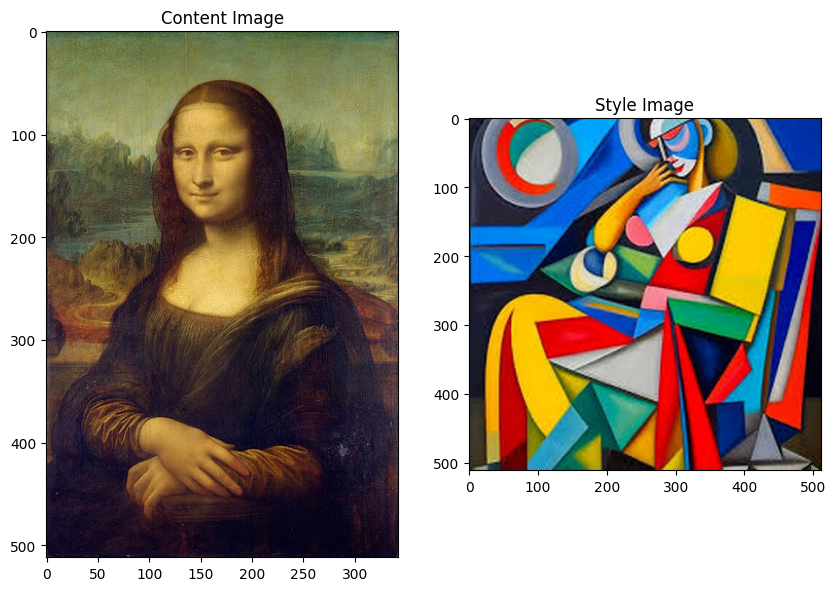

In [ ]:
plt.figure(figsize=(10,10))

content = load_img(content_path).astype('uint8')
style = load_img(style_path).astype('uint8')

plt.subplot(1, 2, 1)
imshow(content, 'Content Image')

plt.subplot(1, 2, 2)
imshow(style, 'Style Image')
plt.show()

In [ ]:
def load_and_process_img(path_to_img):
  img = load_img(path_to_img)
  img = tf.keras.applications.resnet50.preprocess_input(img)
  return img

In [ ]:
def deprocess_img(processed_img):
  x = processed_img.copy()
  if len(x.shape) == 4:
    x = np.squeeze(x, 0)
  assert len(x.shape) == 3, ("Input to deprocess image must be an image of "
                             "dimension [1, height, width, channel] or [height, width, channel]")
  if len(x.shape) != 3:
    raise ValueError("Invalid input to deprocessing image")

  # perform the inverse of the preprocessiing step
  x[:, :, 0] += 103.939
  x[:, :, 1] += 116.779
  x[:, :, 2] += 123.68
  x = x[:, :, ::-1]

  x = np.clip(x, 0, 255).astype('uint8')
  return x

In [ ]:
resnet = tf.keras.applications.resnet50.ResNet50(weights='imagenet')
resnet.summary()


Model: "resnet50"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_6 (InputLayer)        [(None, 224, 224, 3)]        0         []                            
                                                                                                  
 conv1_pad (ZeroPadding2D)   (None, 230, 230, 3)          0         ['input_6[0][0]']             
                                                                                                  
 conv1_conv (Conv2D)         (None, 112, 112, 64)         9472      ['conv1_pad[0][0]']           
                                                                                                  
 conv1_bn (BatchNormalizati  (None, 112, 112, 64)         256       ['conv1_conv[0][0]']          
 on)                                                                                       

In [ ]:
content_layers = ['conv5_block3_out']
style_layers = ['conv1_conv', 'conv2_block3_out', 'conv3_block4_out', 'conv4_block6_out', 'conv5_block3_out']





num_content_layers = len(content_layers)
num_style_layers = len(style_layers)

In [ ]:
def get_model():
  """ Creates our model with access to intermediate layers.

  This function will load the ResNet50 model and access the intermediate layers.
  These layers will then be used to create a new model that will take input image
  and return the outputs from these intermediate layers from the ResNet50 model.

  Returns:
    returns a keras model that takes image inputs and outputs the style and
      content intermediate layers.
  """
  # Load our model. We load pretrained ResNet50, trained on imagenet data
  resnet = tf.keras.applications.resnet50.ResNet50(include_top=False, weights='imagenet')
  resnet.trainable = False
  # Get output layers corresponding to style and content layers
  style_outputs = [resnet.get_layer(name).output for name in style_layers]
  content_outputs = [resnet.get_layer(name).output for name in content_layers]
  model_outputs = style_outputs + content_outputs
  # Build model
  return models.Model(resnet.input, model_outputs)

In [ ]:
def get_content_loss(base_content, target):
  return tf.reduce_mean(tf.square(base_content - target))

In [ ]:
def gram_matrix(input_tensor):
  # We make the image channels first
  channels = int(input_tensor.shape[-1])
  a = tf.reshape(input_tensor, [-1, channels])
  n = tf.shape(a)[0]
  gram = tf.matmul(a, a, transpose_a=True)
  return gram / tf.cast(n, tf.float32)

def get_style_loss(base_style, gram_target):
  """Expects two images of dimension h, w, c"""
  # height, width, num filters of each layer
  # We scale the loss at a given layer by the size of the feature map and the number of filters
  height, width, channels = base_style.get_shape().as_list()
  gram_style = gram_matrix(base_style)

  return tf.reduce_mean(tf.square(gram_style - gram_target))# / (4. * (channels ** 2) * (width * height) ** 2)

In [ ]:
def get_feature_representations(model, content_path, style_path):
  """Helper function to compute our content and style feature representations.

  This function will simply load and preprocess both the content and style
  images from their path. Then it will feed them through the network to obtain
  the outputs of the intermediate layers.

  Arguments:
    model: The model that we are using.
    content_path: The path to the content image.
    style_path: The path to the style image

  Returns:
    returns the style features and the content features.
  """
  # Load our images in
  content_image = load_and_process_img(content_path)
  style_image = load_and_process_img(style_path)

  # batch compute content and style features
  style_outputs = model(style_image)
  content_outputs = model(content_image)


  # Get the style and content feature representations from our model
  style_features = [style_layer[0] for style_layer in style_outputs[:num_style_layers]]
  content_features = [content_layer[0] for content_layer in content_outputs[num_style_layers:]]
  return style_features, content_features

In [ ]:
def compute_loss(model, loss_weights, init_image, gram_style_features, content_features):
  """This function will compute the loss total loss.

  Arguments:
    model: The model that will give us access to the intermediate layers
    loss_weights: The weights of each contribution of each loss function.
      (style weight, content weight, and total variation weight)
    init_image: Our initial base image. This image is what we are updating with
      our optimization process. We apply the gradients wrt the loss we are
      calculating to this image.
    gram_style_features: Precomputed gram matrices corresponding to the
      defined style layers of interest.
    content_features: Precomputed outputs from defined content layers of
      interest.

  Returns:
    returns the total loss, style loss, content loss, and total variational loss
  """
  style_weight, content_weight = loss_weights

  # Feed our init image through our model. This will give us the content and
  # style representations at our desired layers. Since we're using eager
  # our model is callable just like any other function!
  model_outputs = model(init_image)

  style_output_features = model_outputs[:num_style_layers]
  content_output_features = model_outputs[num_style_layers:]

  style_score = 0
  content_score = 0

  # Accumulate style losses from all layers
  # Here, we equally weight each contribution of each loss layer
  weight_per_style_layer = 1.0 / float(num_style_layers)
  for target_style, comb_style in zip(gram_style_features, style_output_features):
    style_score += weight_per_style_layer * get_style_loss(comb_style[0], target_style)

  # Accumulate content losses from all layers
  weight_per_content_layer = 1.0 / float(num_content_layers)
  for target_content, comb_content in zip(content_features, content_output_features):
    content_score += weight_per_content_layer* get_content_loss(comb_content[0], target_content)

  style_score *= style_weight
  content_score *= content_weight

  # Get total loss
  loss = style_score + content_score
  return loss, style_score, content_score

In [ ]:
def compute_grads(cfg):
  with tf.GradientTape() as tape:
    all_loss = compute_loss(**cfg)
  # Compute gradients wrt input image
  total_loss = all_loss[0]
  return tape.gradient(total_loss, cfg['init_image']), all_loss

In [ ]:
import IPython.display

def run_style_transfer(content_path,
                       style_path,
                       num_iterations=1000,
                       content_weight=1,
                       style_weight=1e6):
  # We don't need to (or want to) train any layers of our model, so we set their
  # trainable to false.
  model = get_model()
  for layer in model.layers:
    layer.trainable = False

  # Get the style and content feature representations (from our specified intermediate layers)
  style_features, content_features = get_feature_representations(model, content_path, style_path)
  gram_style_features = [gram_matrix(style_feature) for style_feature in style_features]

  # Set initial image
  init_image = load_and_process_img(content_path)
  init_image = tf.Variable(init_image, dtype=tf.float32)
  # Create our optimizer
  opt = Adam(learning_rate=20, beta_1=0.99, epsilon=1e-1)


  # Store our best result
  best_loss, best_img = float('inf'), None

  # Create a nice config
  loss_weights = (style_weight, content_weight)
  cfg = {
      'model': model,
      'loss_weights': loss_weights,
      'init_image': init_image,
      'gram_style_features': gram_style_features,
      'content_features': content_features
  }

  # For displaying
  num_rows = 2
  num_cols = 5
  display_interval = num_iterations/(num_rows*num_cols)
  start_time = time.time()
  global_start = time.time()

  norm_means = np.array([103.939, 116.779, 123.68])
  min_vals = -norm_means
  max_vals = 255 - norm_means

  imgs = []
  for i in range(num_iterations):
    grads, all_loss = compute_grads(cfg)
    loss, style_score, content_score = all_loss
    opt.apply_gradients([(grads, init_image)])
    clipped = tf.clip_by_value(init_image, min_vals, max_vals)
    init_image.assign(clipped)
    end_time = time.time()

    print(". ", end="") # Fo tracking progress

    if loss < best_loss:
      # Update best loss and best image from total loss.
      best_loss = loss
      best_img = deprocess_img(init_image.numpy())

    if i % display_interval== 0:
      start_time = time.time()

      # Use the .numpy() method to get the concrete numpy array
      plot_img = init_image.numpy()
      plot_img = deprocess_img(plot_img)
      imgs.append(plot_img)
      IPython.display.clear_output(wait=True)
      IPython.display.display_png(Image.fromarray(plot_img))
      print('Iteration: {}'.format(i))
      print('Total loss: {:.4e}, '
            'style loss: {:.4e}, '
            'content loss: {:.4e}, '
            'time: {:.4f}s'.format(loss, style_score, content_score, time.time() - start_time))
  print('Total time: {:.4f}s'.format(time.time() - global_start))
  IPython.display.clear_output(wait=True)
  plt.figure(figsize=(14,4))
  for i,img in enumerate(imgs):
      plt.subplot(num_rows,num_cols,i+1)
      plt.imshow(img)
      plt.xticks([])
      plt.yticks([])

  return best_img, best_loss



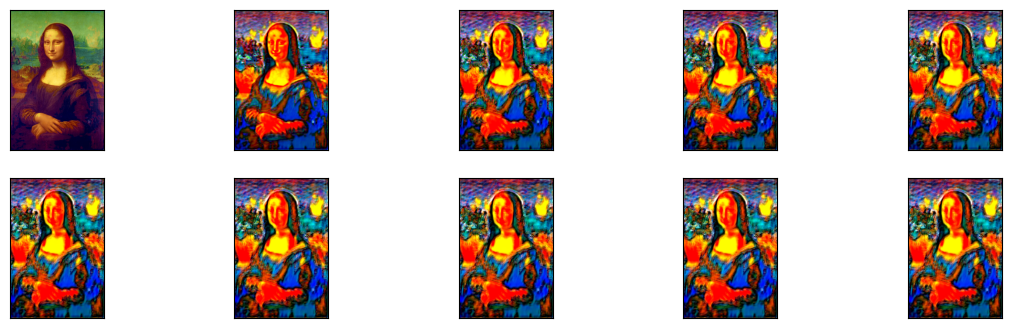

In [ ]:
best, best_loss = run_style_transfer(content_path,style_path, num_iterations=1000)

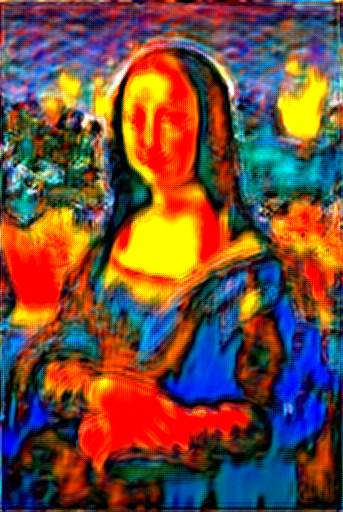

In [ ]:
Image.fromarray(best)

In [ ]:
Image.fromarray(best).save("out.jpg", "JPEG", quality=80, optimize=True, progressive=True)

# To download images from colab
from google.colab import files
files.download('out.jpg')

In [ ]:
def show_results(best_img, content_path, style_path, show_large_final=True):
  plt.figure(figsize=(10, 5))
  content = load_img(content_path)
  style = load_img(style_path)

  plt.subplot(1, 2, 1)
  imshow(content, 'Content Image')

  plt.subplot(1, 2, 2)
  imshow(style, 'Style Image')

  if show_large_final:
    plt.figure(figsize=(10, 10))

    plt.imshow(best_img)
    plt.title('Output Image')
    plt.show()

<ipython-input-25-f1ad2ad8c269>:7: DeprecationWarning: ANTIALIAS is deprecated and will be removed in Pillow 10 (2023-07-01). Use LANCZOS or Resampling.LANCZOS instead.
  img = img.resize((round(img.size[0] * scale), round(img.size[1] * scale)), Image.ANTIALIAS)


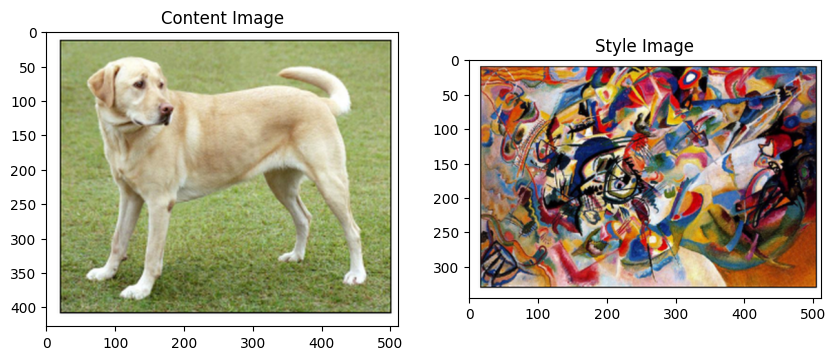

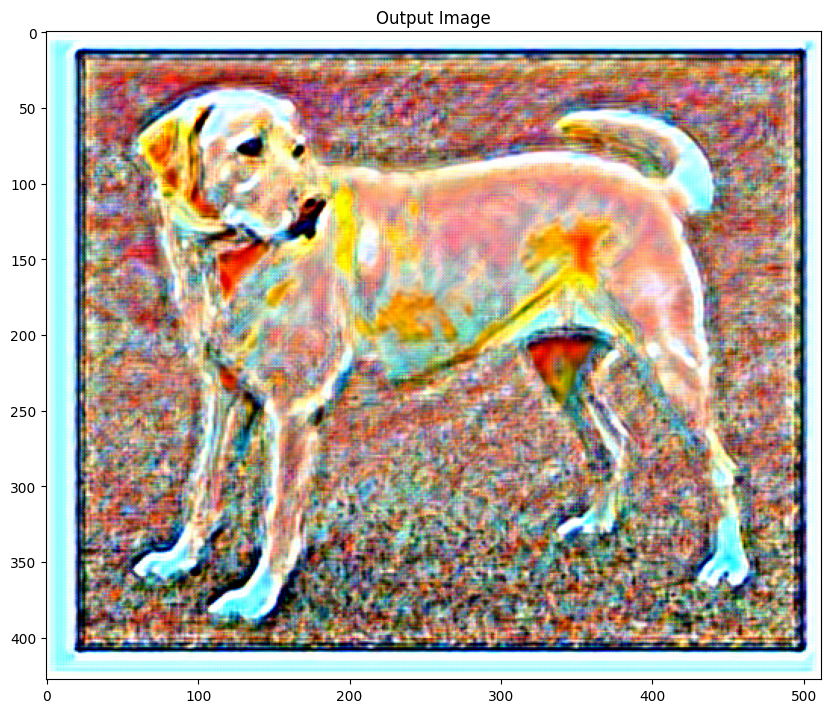

In [ ]:
show_results(best, content_path, style_path)